# 2/27/15 Wemo Data
We collected `time`, `sensor_id`, and `current_power` for five sensors.

## Questions
1. How many sensor readings are `0`?
2. What was the max power reading per sensor?
3. What was the average power reading per sensor?
4. Were there large jumps in the power readings?

In [74]:
# Imports
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
pd.__version__

Populating the interactive namespace from numpy and matplotlib


'0.15.2'

In [75]:
# Read in data from csv file.
columns = ["time", "sensor", "power"]
path = "15-2-27-wemo.csv"
time_format = "%H:%M:%S.%f"
dateparse = lambda x: pd.datetime.fromtimestamp(float(x)).strftime(time_format)
data = pd.read_csv(path, names=columns, parse_dates=[0], date_parser=dateparse)

In [76]:
data.head()

,time,sensor,power
0,15:03:12.240000,WeMo5,0
1,15:03:12.269999,WeMo4,25640
2,15:03:12.339999,WeMo6,360
3,15:03:12.470000,WeMo1,159335
4,15:03:12.579999,WeMo3,0


In [77]:
# Convert power from Watts * 100 to just Watts.
data['power'] /= 100
data.head()

,time,sensor,power
0,15:03:12.240000,WeMo5,0.00
1,15:03:12.269999,WeMo4,256.40
2,15:03:12.339999,WeMo6,3.60
3,15:03:12.470000,WeMo1,1593.35
4,15:03:12.579999,WeMo3,0.00


In [78]:
# How many sensor readings are `0`?
print("There are {0} zero entries".format(len(data[data.power == 0])))

There are 20388 zero entries


In [79]:
# Remove zero entries.
non_zero = data[data.power != 0]
non_zero.head()

,time,sensor,power
1,15:03:12.269999,WeMo4,256.40
2,15:03:12.339999,WeMo6,3.60
3,15:03:12.470000,WeMo1,1593.35
6,15:03:12.670000,WeMo4,256.25
7,15:03:12.700000,WeMo6,3.60


In [80]:
# Group data by sensor
groups = non_zero.groupby(non_zero.sensor)

In [81]:
groups.describe()

power
sensor                    
WeMo1  count  20396.000000
       mean    1397.519818
       std      189.924803
       min     1237.600000
       25%     1259.300000
       50%     1270.000000
       75%     1533.950000
       max     1867.400000
WeMo4  count  19937.000000
       mean     256.874036
       std        0.657321
       min      254.900000
       25%      256.400000
       50%      256.900000
       75%      257.350000
       max      258.450000
WeMo6  count  18154.000000
       mean       3.544395
       std        0.167274
       min        3.000000
       25%        3.450000
       50%        3.550000
       75%        3.650000
       max        4.150000

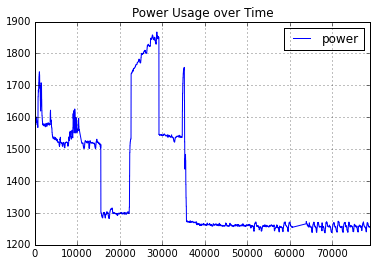

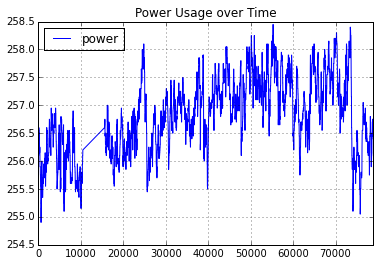

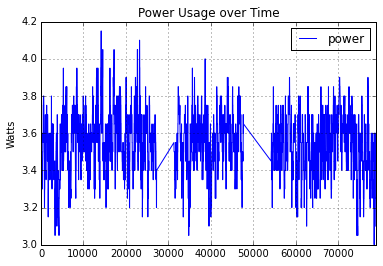

In [82]:
ax = groups.plot(title="Power Usage over Time")
plt.ylabel("Watts")